# 학습목표
* 딥러닝 모델 (네트워크)를 구성하는 레이어에 대한 개념을 이해합니다.
* 딥러닝 모델을 구성하는 방법에 대해서 학습합니다.

# 딥러닝 구조와 레이어(Layer)

## 01. 딥러닝 구조

### 모델 구조
케라스에서 제공하는 API들의 구성도를 살펴보면, 크게 Model API와 Layer API가 있고 필요한 모듈들을 Modules API를 호출해서 사용합니다.     
딥러닝 모델은 여러 레이어들로 구성되어 있습니다.
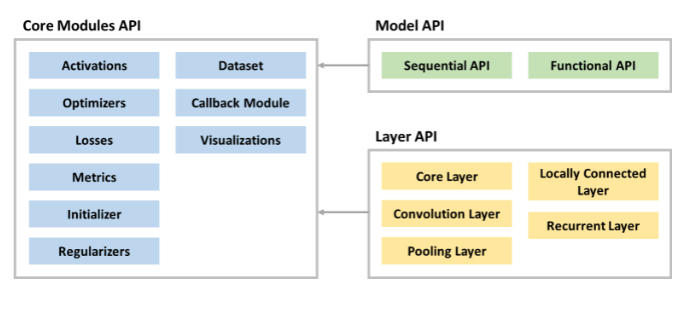

## 02. 레이어(Layer)
* 딥려닝은 여러개의 레이어로 구성
* 기본적으로 입력층, 은닉층, 출력층으로 구분된다.
* 레이어는 딥러닝 모델을 구성하는 핵심 데이터 구조로서 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
* 입력층이 입력을 받고 입력층으로부터 은닉층이 하나 이상의 텐서를 입력으로 받아서 하나 이상의 텐서를 출력하는 형태이다. > 기본 레이어 처리
  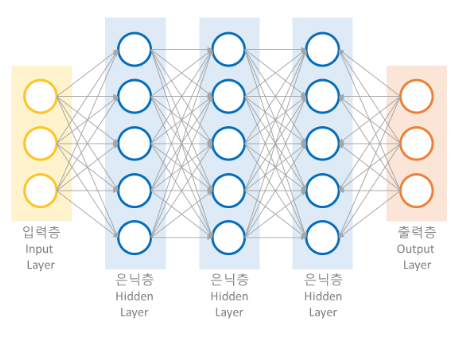

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Input 객체
* 딥러닝 모델의 입력을 정의할 때 사용
* 입력 데이터의 모양인 shape와 예상되는 데이터 유형이 dtype 등을 포함한다.

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor shape=(None, 8), dtype=int32, sparse=False, ragged=False, name=keras_tensor>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [4]:
# Input 객체는 배치 크기를 batch_size로 지정할 수 있고, name을 통해서 이름을 지정할 수도 있다.
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor shape=(16, 28, 28), dtype=float32, sparse=False, ragged=False, name=keras_tensor_2>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor shape=(16, 28, 28), dtype=float32, sparse=False, ragged=False, name=input>

### Dense 레이어
* 완전연결계층(Fully - Connected Layer)으로 노드수 (유닛수)를 지정하면 생성
* Dense 레이어에 대한 자세한 내용은 다음 링크를 참조 : https://keras.io/api/layers/core_layers/dense/

In [6]:
# 출력 뉴런 수를 10개로 지정 (즉, 출력 차원이 10인 밀집층)
layers.Dense(10)  

<Dense name=dense, built=False>

In [7]:
# 레이어에 name을 통해 이름을 지정하여 레이어간의 구분이 가능하다.
layers.Dense(10, name='layer1')

<Dense name=layer1, built=False>

In [8]:
# 레이어에서 사용할 활성화 함수(activation)를 지정하여 생성하는 것이 가능하다.
layers.Dense(10, activation='softmax')

<Dense name=dense_1, built=False>

활성화 함수란:    
뉴런의 출력값을 비선형적으로 변환하여 다음 층에 전달하는 함수.    
딥러닝이 복잡한 패턴을 학습할 수 있게 만드는 핵심 요소.

In [9]:
# 레이어에 유닛수와 활성화 함수 그리고 이름까지 지정하여 사용하는 것도 가능하다.
layers.Dense(10, activation='relu', name='Dense Layer')

<Dense name=Dense Layer, built=False>

In [10]:
# 랜덤으로 값을 만들고, 생성한 레이어에 그 값을 입력으로 사용한 뒤에 레이어 가중치 값과 결과 값을 확인해 봅시다.
inputs = tf.random.uniform(shape = (5, 2))
print(inputs)
print('='*20)
layer = layers.Dense(10, activation = 'relu')
outputs = layer(inputs)
print(layer.weights) # 가중치
print('='*20)
print(layer.bias)    # 편차
print('='*20)
print(outputs)

tf.Tensor(
[[0.9156122  0.38292098]
 [0.83571124 0.4381281 ]
 [0.29913306 0.7676922 ]
 [0.11129332 0.06289542]
 [0.93472314 0.15518534]], shape=(5, 2), dtype=float32)
[<Variable path=dense_2/kernel, shape=(2, 10), dtype=float32, value=[[ 0.50501853  0.40886134 -0.55600864 -0.555163   -0.6339397   0.26554692
  -0.26047054 -0.62242514  0.5636291   0.20303887]
 [-0.55142796 -0.14307928 -0.04844159 -0.24025947 -0.28277668 -0.40494573
  -0.3800339  -0.46820933  0.3769818  -0.18704635]]>, <Variable path=dense_2/bias, shape=(10,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>]
<Variable path=dense_2/bias, shape=(10,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>
tf.Tensor(
[[0.25124782 0.3195704  0.         0.         0.         0.08807579
  0.         0.         0.6604199  0.1142809 ]
 [0.18045358 0.27900293 0.         0.         0.         0.04450244
  0.         0.         0.6361975  0.0877316 ]
 [0.         0.0124631  0.         0.         0.         0.
  0.         0.   

### Activation 레이어
* 활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할
* 크게 선형 활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분
* 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형 활성화 함수를 사용한다.

케라스의 Dense 레이어에서 미리 활성화 함수를 지정할 수도 있지만, 필요에 따라 별도의 Activation 레이어를 만들어줄 수 있습니다.    
keras에서 제공하는 활성화 함수(activation function)의 종류: https://keras.io/api/layers/activations/

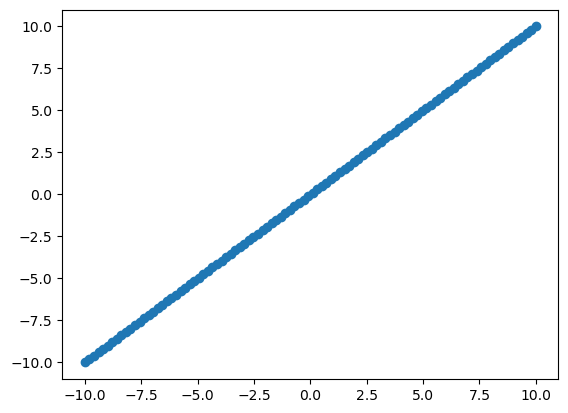

In [11]:
# Activation 레이어가 어떤식으로 동작하는지 살펴보기 위해서 -10부터 10 사이의 수 가운데 100개의 값을 입력 데이터로 사용해 봅시다.
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

### **시그모이드 함수**    
활성화 함수 중에서도 오래전부터 사용되던 시그모이드(sigmoid) 함수는 다음과 같이 표현됩니다.     
    
$
\Huge \sigma(x) = \frac{1}{1 + e^{-x}}
$
    
시그모이드 함수는 주로 확률 예측 모델에 자주 사용되며, 출력값이 0과 1 사이로 나타납니다.     
그러다보니 0과 1 사이에서 포화(saturate)되는 문제가 있습니다.     
즉, 입력값이 작아도 출력값이 0 이하가 될 수 없고, 커져도 1 이상이 될 수 없기 때문에 훈련 시간이 오래걸리고,     
그래디언트(gradient)가 0에 가까워져서 가중치 업데이트가 발생하지 않게 됩니다.    

> 시그모이드 함수는 비선형 함수이지만 0과 1 사이에서는 선형 함수입니다.

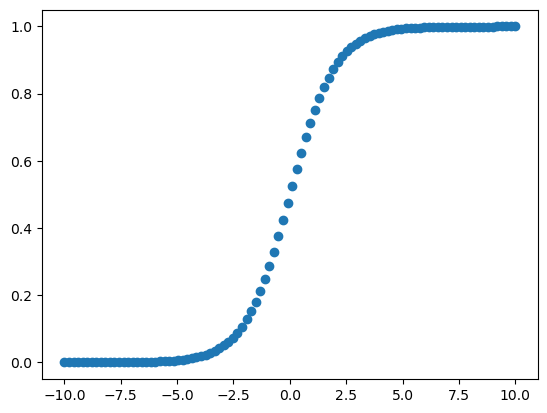

In [12]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

### **하이퍼볼릭 탄젠트 함수**    
하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수는 다음과 같이 표현됩니다.    
    
$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
     
하이퍼볼릭 탄젠트 함수는 0을 중심으로 -1과 1 사이의 값이 나타납니다.     
일반적으로 시그모이드 함수보다는 빨리 훈련되지만, 여전히 -1과 1 사이에서 포화되는 문제가 있습니다.
> 하이퍼볼릭 탄젠트 함수는 비선형 함수이지만 0과 1 사이에서는 선형 함수입니다.

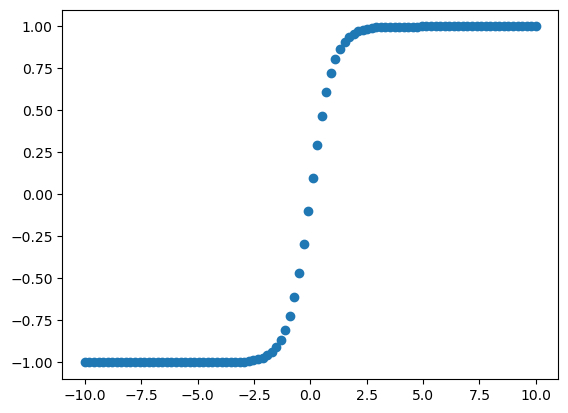

In [13]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

### **ReLU 함수**    
최근에 가장 많이 사용하는 활성화 함수인 ReLU(Rectified Linear Unit)는 다음과 같이 표현됩니다.    

$f(x) = \max(0, x)$    

ReLU 함수의 출력값은 0부터 무한대까지의 범위의 값을 가지므로 하이퍼볼릭 탄젠트 함수보다 몇 배는 더 빠르게 훈련됩니다.     
다만 ReLU 함수 출력값이 0이 중심이 아니고, 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제가 있습니다.

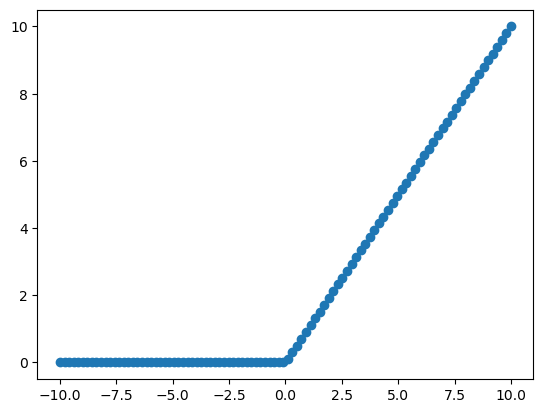

In [14]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

### **Leaky ReLU 함수**    
Leaky ReLU 함수는 ReLU 함수의 문제점, 즉 노드 출력을 0으로만 하던 문제를 해결하였으며 다음과 같이 표현됩니다.    
    
$f(x) = \max(0.01x,\ x)$    
    
Leaky ReLU 함수는 노드 출력을 0이 아닌 아주 작은 음수값으로 출력하게 만들어 해결하였습니다.

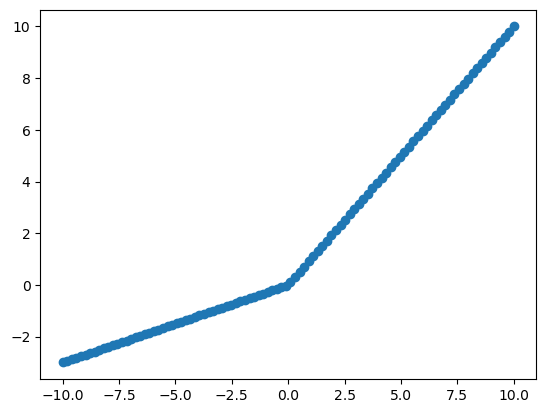

In [15]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

### **ELU 함수**
ELU(Exponential Linear Unit) 함수는 ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수이며, 다음과 같이 표현됩니다.    
    
$ELU(x) = \begin{cases} x & \text{if } x \ge 0 \\ \alpha (e^x - 1) & \text{if } x < 0 \end{cases}$    
    
ELU 함수는 0 이하에서는 exponential 연산이 수행되므로 계산 비용이 높아지는 단점이 있습니다.

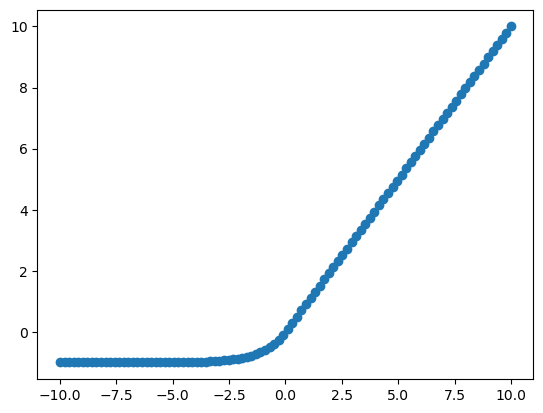

In [16]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

### Flatten 레이어
Flatten 레이어는 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환합니다.

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Q.입력값 (224, 224, 1)를 Flatten 레이어에 넣기
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten(input_shape=(224, 224, 1))(inputs)
print(layer.shape)

(None, 50176)


# 03 딥러닝 모델
Sequential API
- 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

Functional API
- 모델 생성에 권장되는 방법
- 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능
- 다중 입출력을 다룰 수 있음

Subclassing API
- 커스터마이징에 최적화된 방법으로 Model 클래스를 상속받아서 사용
- Functional API로도 구현할 수 없는 모델들도 구현이 가능하다.
- 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 한다.

In [19]:
# 케라스에서 모델과 유틸리티들을 사용할 수 있도록 model, utils를 임포트하기
from tensorflow.keras import models, utils

## Sequential API

In [20]:
# Sequential API
# Sequential 객체 생성 후,add()를 이용하여 사용할 레이어들을 추가하는 방법
model = models.Sequential()
model.add(layers.Input(shape = (28, 28)))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# model을 시각적으로 확인하기 위해 pydot 설치하기
!pip install pydot

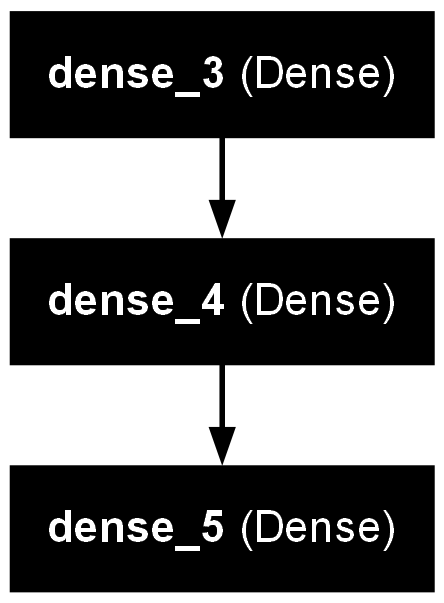

In [22]:
# plot_model() 함수를 통해 딥러닝 모델의 모습을 시각적으로 확인
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# plot_model(model, to_file='model.png', show_shapes=True)
plot_model(model, show_shapes=False, show_layer_names=True)

In [23]:
# 다른 방법으로는 Sequential 인자에 한번에 추가하는 방법이 있다.
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

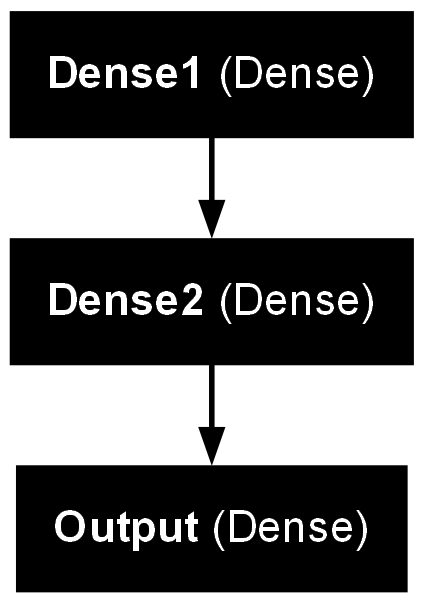

In [24]:
# utils.plot_model(model)가 안나와서 아래처럼 수정함.

plot_model(model, show_shapes=False, show_layer_names=True)

## Functional API
모델 생성에 Functional API를 이용하는 방법은 가장 권장되는 방법

In [25]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

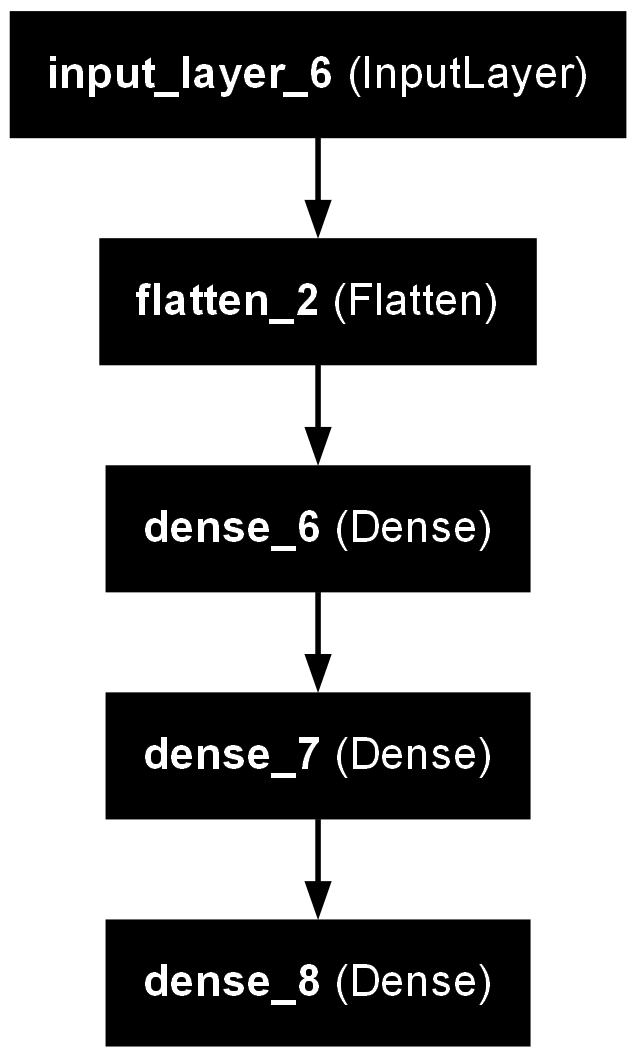

In [26]:
plot_model(model, show_shapes=False, show_layer_names=True)

In [27]:
# Functional API를 이용하면 Input 객체를 여러 레이어에서 사용하는 것이 가능하다.
# 아래의 예제에서는 Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합했다.
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 28, 100)   │      2,900 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 28, 30)    │      3,030 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 58)    │          0 │ input_layer_7[0]… │
│ (Concatenate)       │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 28, 1)     │         59 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,989 (23.39 KB)

 Trainable params: 5,989 (23.39 KB)

 Non-trainable params: 0 (0.00 B)

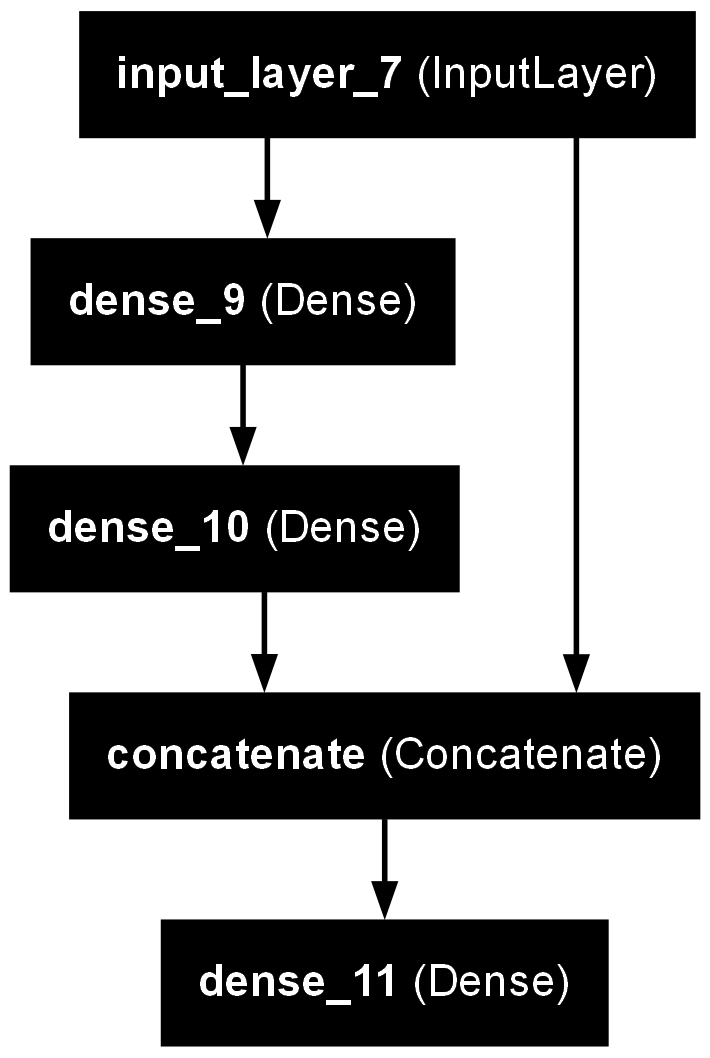

In [28]:
plot_model(model, show_shapes=False, show_layer_names=True)

In [29]:
# Functional API를 이용하면 여러 Input 객체를 사용하는 것도 가능합니다.
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 10, 100)   │      2,900 │ Input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 10, 20)    │          0 │ Input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 10, 1)     │         21 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,931 (15.36 KB)

 Trainable params: 3,931 (15.36 KB)

 Non-trainable params: 0 (0.00 B)

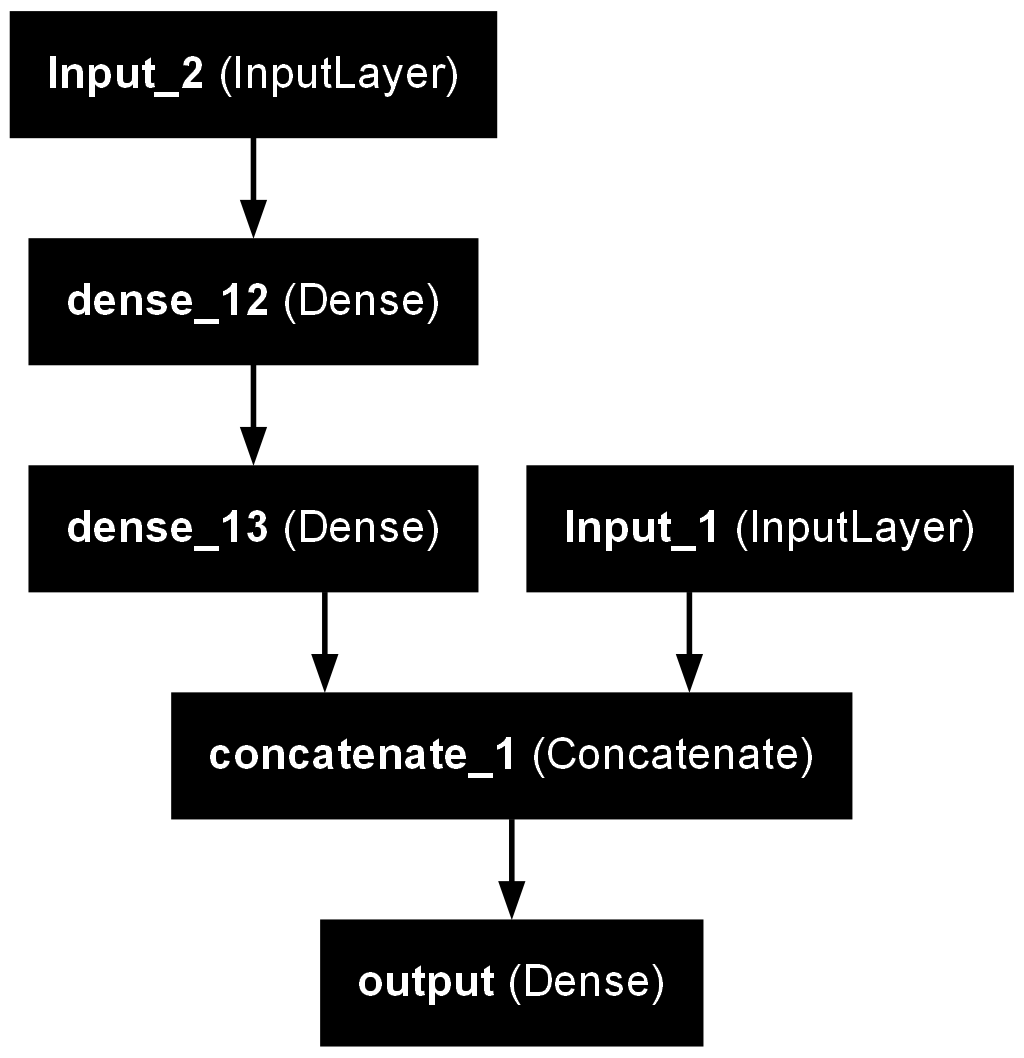

In [30]:
plot_model(model, show_shapes=False, show_layer_names=True)

In [31]:
# Functional API를 이용하면 결과를 여러개로 나눠서 사용하는 것도 가능합니다.
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ (InputLayer) │ (None, 10, 10)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 10, 100)   │      1,100 │ input_[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10, 1)     │         11 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sum_output (Dense)  │ (None, 10, 1)     │         11 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,132 (8.33 KB)

 Trainable params: 2,132 (8.33 KB)

 Non-trainable params: 0 (0.00 B)

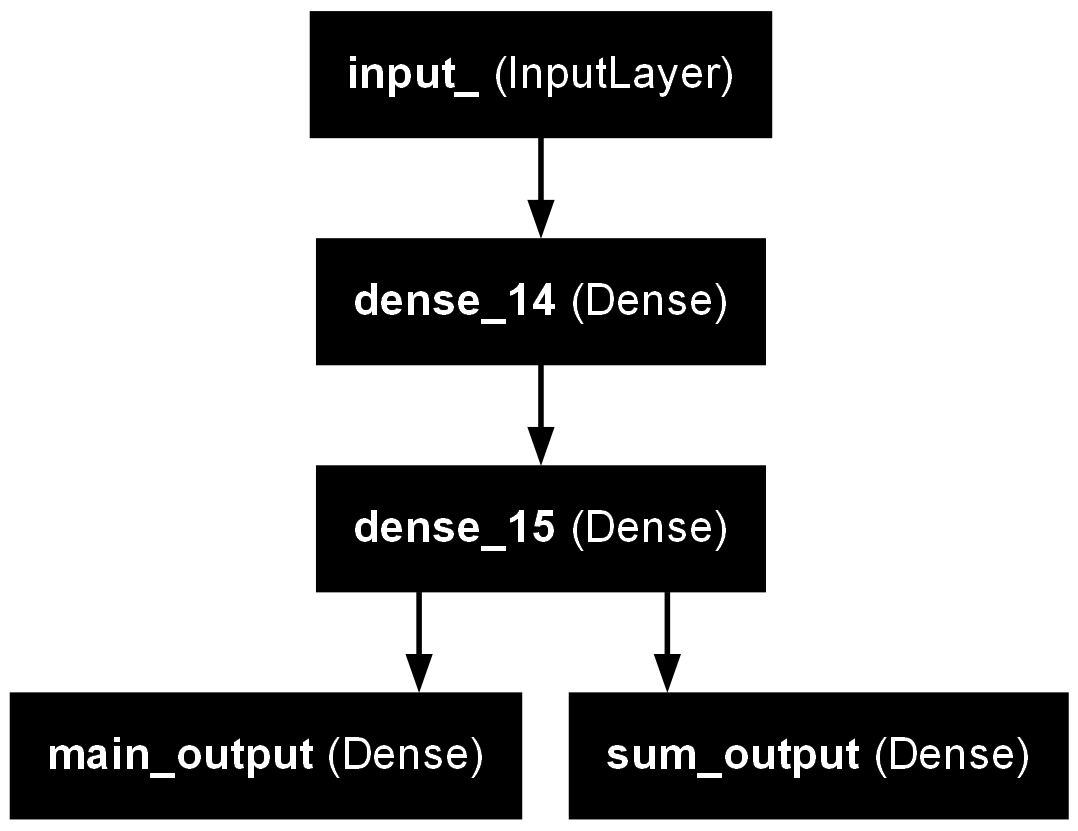

In [32]:
plot_model(model, show_shapes=False, show_layer_names=True)

In [34]:
# Functional API를 이용하여 다중 입력과 다중 출력이 가능한 모델도 만들 수 있습니다.
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 10, 100)   │      2,900 │ input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 10, 20)    │          0 │ input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10, 1)     │         21 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sum_output (Dense)  │ (None, 10, 1)     │         11 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,942 (15.40 KB)

 Trainable params: 3,942 (15.40 KB)

 Non-trainable params: 0 (0.00 B)

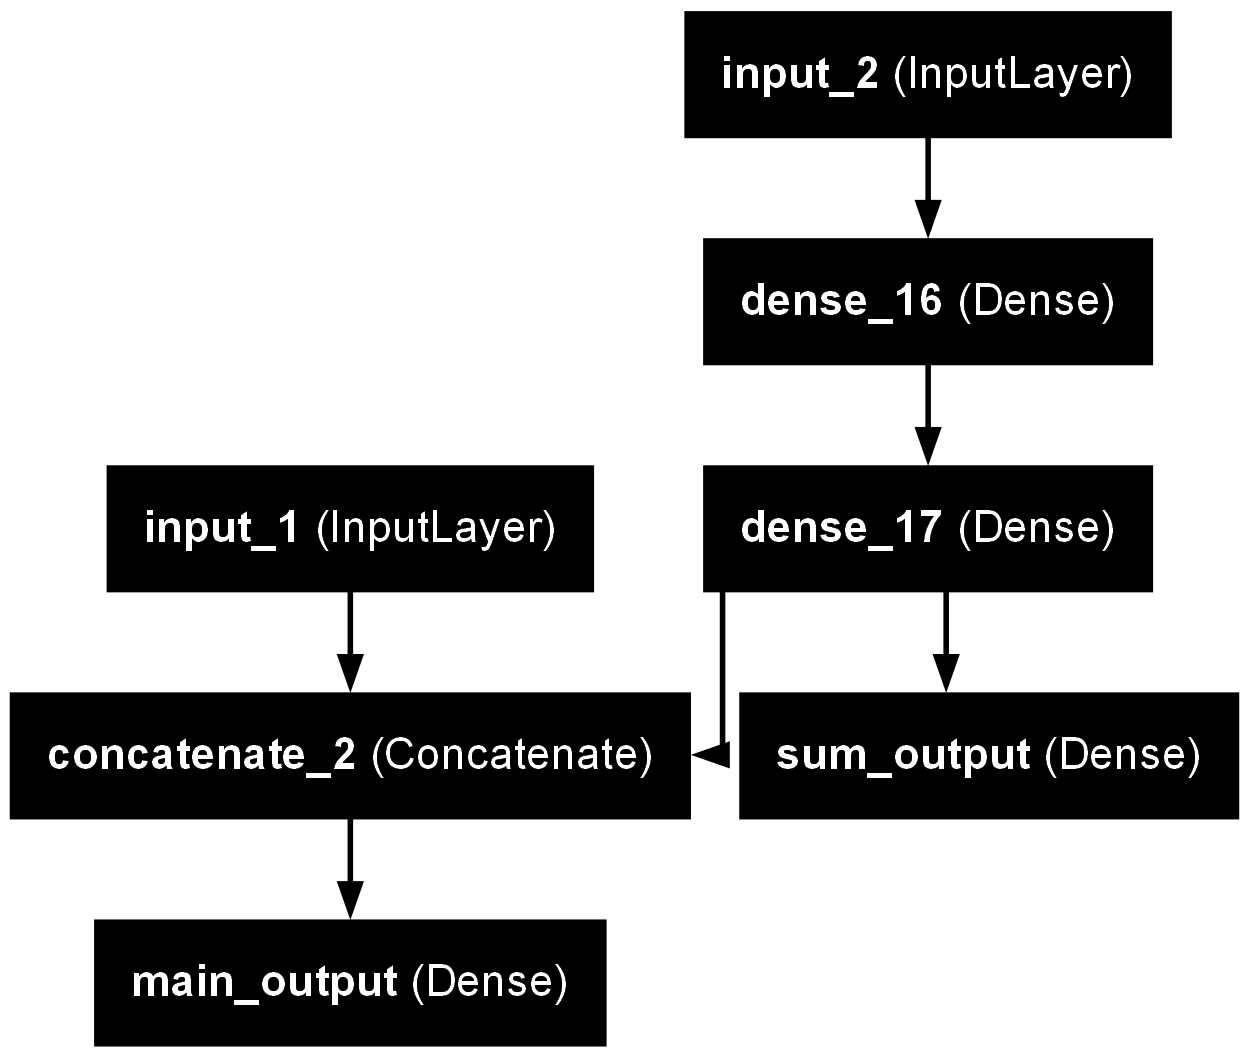

In [35]:
plot_model(model, show_shapes=False, show_layer_names=True)

## Subclassing API
서브클래싱(Subclassing) 방법은 커스터마이징에 최적화된 방법으로,     
Model 클래스를 상속받아서 사용하고 모델에 포함되는 다음과 같은 기능을 사용할 수 있습니다.
- fit(): 모델 학습
- evaluate(): 모델 평가
- predict(): 모델 예측
- save(): 모델 저장
- load(): 모델 불러오기
- call(): 메소드안에서 원하는 계산 가능
    
Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만,    
객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 합니다.

In [36]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

## 실습해보기

In [39]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape = (100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation = 'relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation = 'relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation = 'softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 400)            │    12,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,100,700 (46.16 MB)

 Trainable params: 12,100,700 (46.16 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = keras.Input(shape = (100, 100, 3), name = 'Input')

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100, 100, 3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 400)            │    12,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,100,700 (46.16 MB)

 Trainable params: 12,100,700 (46.16 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Subclassing API 모델을 완성해 보기

class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation = 'relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation = 'relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation = 'softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])

# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))

model = YourModel()
model(data)

model.summary()

Model: "your_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (1, 30000)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (1, 400)               │    12,000,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (1, 200)               │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (1, 100)               │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,100,700 (46.16 MB)

 Trainable params: 12,100,700 (46.16 MB)

 Non-trainable params: 0 (0.00 B)

### 마지막 문제
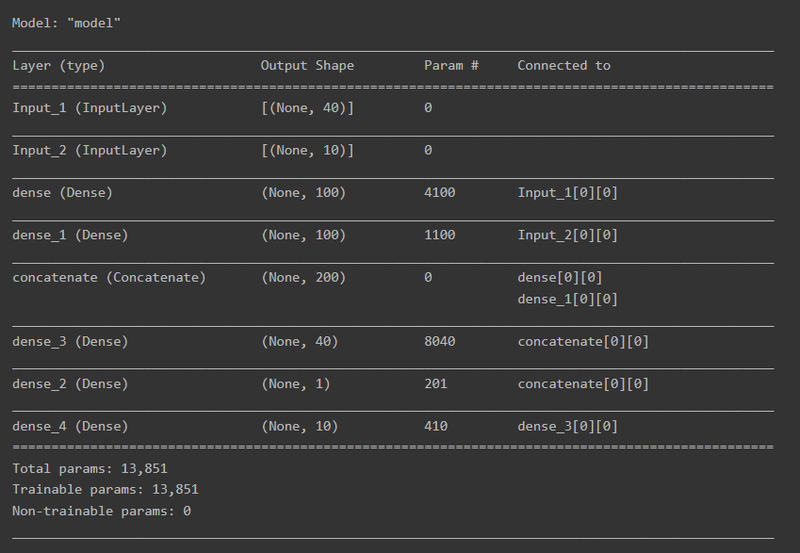
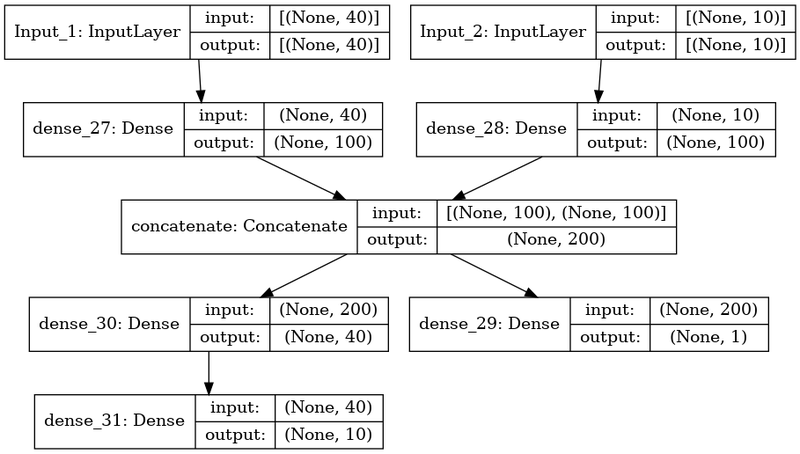
위 표와 그래프는 각각 동일한 모델의 summary() 메서드와 utils.plot_model() 함수의 결과값입니다. 위 모델을 한 번 구현해봅시다.

In [41]:
from tensorflow.keras import Input, Model, layers

# 입력 2개 정의
input1 = Input(shape=(40,), name='Input_1')
input2 = Input(shape=(10,), name='Input_2')

# 각각 Dense 레이어 통과
dense_from_input1 = layers.Dense(100, activation='relu')(input1)
dense_from_input2 = layers.Dense(100, activation='relu')(input2)

# 두 출력 연결 (합치기)
concat = layers.Concatenate()([dense_from_input1, dense_from_input2])  # shape = (None, 200)

# 합쳐진 걸로 다시 여러 개의 Dense 연결 (출력 3개)
output1 = layers.Dense(40, activation='relu')(concat)   # shape = (None, 40)
output2 = layers.Dense(1)(concat)                       # shape = (None, 1)
output3 = layers.Dense(10)(output1)                     # shape = (None, 10)

# 모델 정의 (입력 2개, 출력 3개)
model = Model(inputs=[input1, input2], outputs=[output1, output2, output3])
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_1             │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_2             │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 100)       │      4,100 │ Input_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 100)       │      1,100 │ Input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 200)       │          0 │ dense_30[0][0],   │
│ (Concatenate)       │                   │            │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 40)        │      8,040 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1)         │        201 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 10)        │        410 │ dense_32[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,851 (54.11 KB)

 Trainable params: 13,851 (54.11 KB)

 Non-trainable params: 0 (0.00 B)

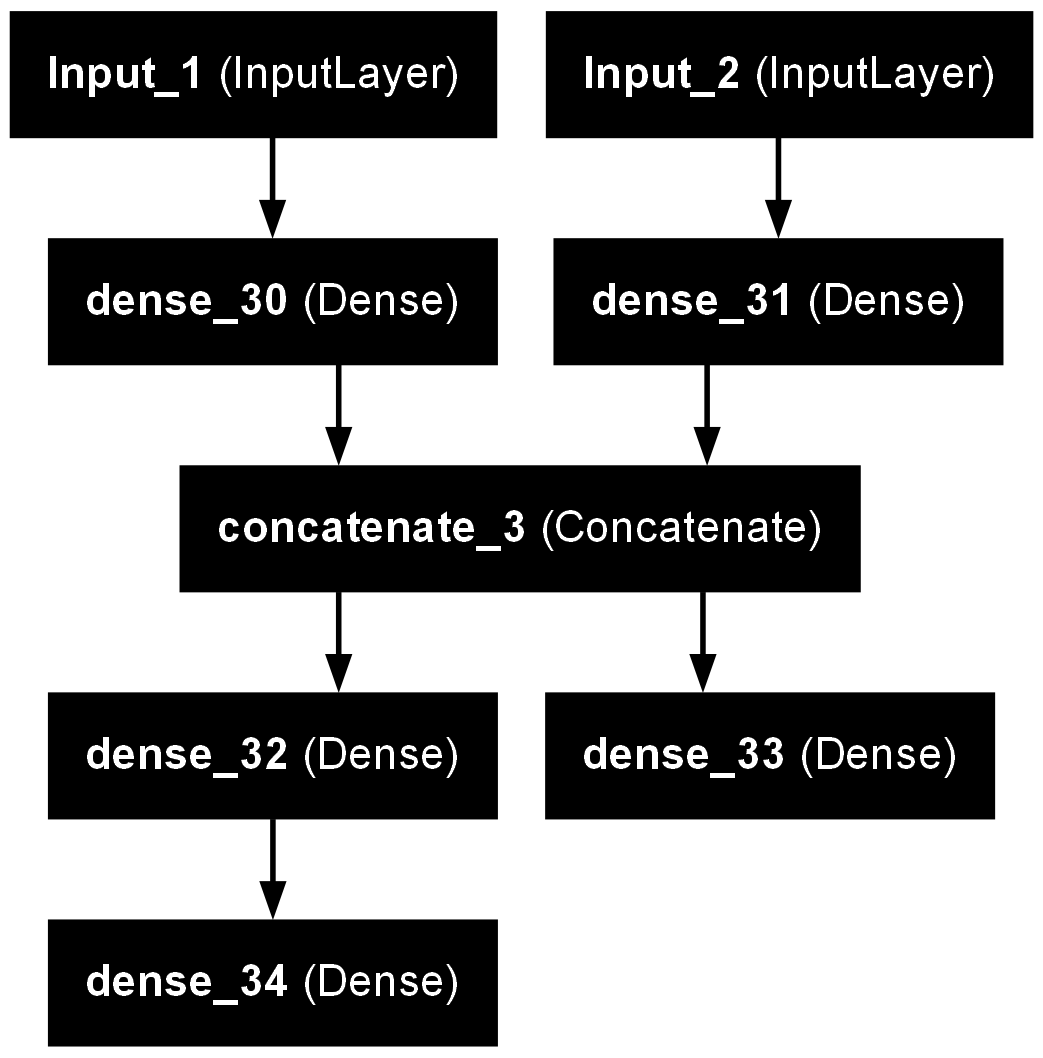

In [42]:
plot_model(model, show_shapes=False, show_layer_names=True)